In [147]:
# basic imports
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
datapath = './'

# import autograd wrapped numpy
import autograd.numpy as np

Problem 1: Implementing sigmoidal Least Squares cost


In [148]:
# define sigmoid function
def sigmoid(t):
  #fill in a line of code below
  return 1/(1 + np.exp(-t))
# sigmoid non-convex logistic least squares cost function
def sigmoid_least_squares(w):
    cost = 0
    for p in range(y.size):
        x_p = x[:,p]
        y_p = y[:,p]
        # finish the following line of code
        cost += (sigmoid(w[0] + w[1]*x_p) - y_p)**2
    return cost/y.size

In [149]:
# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import numpy as np
from autograd import value_and_grad 

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha_choice,max_its,w,version):
    # compute the gradient function of our input function - note this is a function too
    # that - when evaluated - returns both the gradient and function evaluations (remember
    # as discussed in Chapter 3 we always ge the function evaluation 'for free' when we use
    # an Automatic Differntiator to evaluate the gradient)
    gradient = value_and_grad(g)

    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # evaluate the gradient, store current weights and cost function value
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)
            
        if version == 'full':
            grad_norm = np.linalg.norm(grad_eval)
            if grad_norm == 0:
                grad_norm += 10**-6*np.sign(2*np.random.rand(1) - 1)
            grad_eval /= grad_norm
        
        # normalize components
        if version == 'component':
            component_norm = np.abs(grad_eval) + 10**(-8)
            grad_eval /= component_norm
            
        if version == 'none':
            grad_eval = grad_eval

        # take gradient descent step
        w = w - alpha*grad_eval
            
    # collect final weights
    weight_history.append(w)
    # compute final cost function value via g itself (since we aren't computing 
    # the gradient at the final step we don't get the final cost function value 
    # via the Automatic Differentiatoor) 
    cost_history.append(g(w))  
    return weight_history,cost_history

In [150]:
# load in data
csvname = datapath + '2d_classification_data_v1_entropy.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 

# run normalized gradient descent
w = np.asarray([-20.0,20.0])[:,np.newaxis]
w_hist, cost_history = gradient_descent(g = sigmoid_least_squares,w = w,version = 'normalized',max_its = 900, alpha_choice = 1)

In [151]:
x

array([[-0.12945952,  0.17126776,  0.18900687,  0.62817746,  0.98698383,
         1.1       ,  1.4       ,  4.        ,  4.3       ,  4.5       ,
         4.7       ]])

In [152]:
x.shape

(1, 11)

In [153]:
y

array([[0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.]])

In [154]:
y.shape

(1, 11)

In [155]:
w = w_hist[-1]

In [156]:
w.shape

(2, 1)

In [157]:
w

array([[-20.83037981],
       [ 19.98355293]])

In [158]:
def model(x, w):
  a = w[0] + np.dot(x.T, w[1:])
  return a.T

In [159]:
y_pred = (model(x, w) > 0).astype(int)

In [160]:
y_pred

array([[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]])

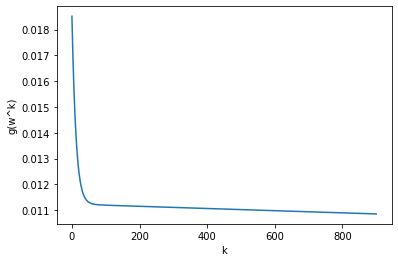

In [161]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cost_history);
plt.xlabel("k");
plt.ylabel("g(w^k)");

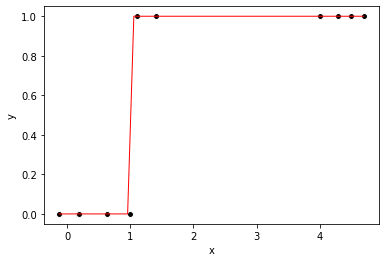

In [162]:
# plot data with linear fit 
s = np.linspace(np.min(x),np.max(x))
w = w_hist[-1]
t = (w[0] + w[1]*s > 0).astype(int)

figure = plt.figure()
plt.plot(s,t,linewidth = 1,color = 'r')
plt.scatter(x,y,linewidth = 1,c='k',edgecolor='w')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Problem 2: Implementing the Cross Entropy cost

In [163]:
# compute linear combination of input point
def model(x,w):
  # finish the function implementation
  a = w[0] + np.dot(x.T,w[1:])
  return a.T

In [164]:
# define sigmoid function
def sigmoid(t):
  # fill in one line of code below
    return 1/(1 + np.exp(-t))

# the convex cross-entropy cost function
def cross_entropy(w):
    # compute sigmoid of model
    a = sigmoid(model(x,w))
    
    # compute cost of label 0 points
    ind = np.argwhere(y == 0)[:,1]
    # fill in one line of code below
    cost = -np.sum(np.log(1 - a[:,ind]))
    
    # add cost on label 1 points
    ind = np.argwhere(y==1)[:,1]
    # fill in one line of code below
    cost -= np.sum(np.log(a[:,ind]))
    
    # compute cross-entropy
    return cost/y.size

In [165]:
# take input/output pairs from data
x = data[:-1,:]
y = data[-1:,:] 

# run gradient descent to minimize the softmax cost
g = cross_entropy; w = np.array([3.0,3.0])[:,np.newaxis]; max_its = 100; alpha_choice = 10**(0);
weight_history,cost_history = gradient_descent(g,alpha_choice,max_its,w, version = 'normalized')

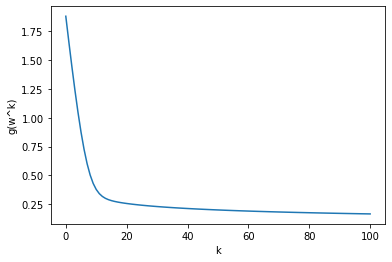

In [166]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cost_history);
plt.xlabel("k");
plt.ylabel("g(w^k)");

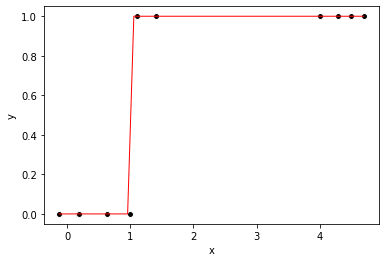

In [167]:
# plot data with linear fit 
s = np.linspace(np.min(x),np.max(x))
w = w_hist[-1]
t = (w[0] + w[1]*s > 0).astype(int)

figure = plt.figure()
plt.plot(s,t,linewidth = 1,color = 'r')
plt.scatter(x,y,linewidth = 1,c='k',edgecolor='w')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Problem 3: Implementing the Softmax cost

In [168]:
# compute linear combination of input point
def model(x,w):
  # finish the function implementation
  a = w[0] + np.dot(x.T,w[1:])
  return a.T

In [169]:
# the convex softmax cost function
def softmax(w):
  # finish the function implementation
  cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
  return cost/float(np.size(y))

In [170]:
# load in data
csvname = datapath + '2d_classification_data_v1.csv'
data = np.loadtxt(csvname,delimiter = ',')

# take input/output pairs from data
x = data[:-1,:]
y = data[-1:,:] 

# run gradient descent to minimize the softmax cost
g = softmax; w = np.array([3.0,3.0])[:,np.newaxis]; max_its = 100; alpha_choice = 1;
weight_history,cost_history = gradient_descent(g,alpha_choice,max_its,w, version = 'normalized')

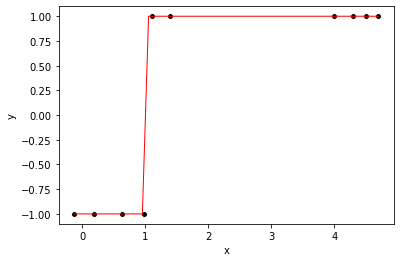

In [171]:
# plot data with linear fit 
s = np.linspace(np.min(x),np.max(x))
w = w_hist[-1]
t = np.sign(w[0] + w[1]*s)
figure = plt.figure()
plt.plot(s,t,linewidth = 1,color = 'r')
plt.scatter(x,y,linewidth = 1,c='k',edgecolor='w')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Problem 4: Implementing the Log Error version of Softmax

In [172]:
# define sigmoid function
def sigmoid(t):
  # fill in one line of code below
    return 1/(1 + np.exp(-t))

# the convex cross-entropy cost function
def softmax(w):
    # compute sigmoid of model
    a = sigmoid(model(x,w))
    
    # compute cost of label 0 points
    ind = np.argwhere(y == -1)[:,1]
    # finish the following line of code
    cost = -np.sum(np.log(1 - a[:,ind]))
    
    # add cost on label 1 points
    ind = np.argwhere(y==+1)[:,1]
    # finish the following line of code
    cost -= np.sum(np.log(a[:,ind]))
    
    # compute cross-entropy
    return cost/y.size

In [173]:
# load in dataset
data = np.loadtxt(datapath + '3d_classification_data_v0.csv',delimiter = ',')


In [174]:
# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 

# run gradient descent to minimize the softmax cost
g = softmax; w = np.random.randn(3,1); max_its = 100; alpha_choice = 1;
weight_history,cost_history = gradient_descent(g,alpha_choice,max_its,w, version = 'normalized')

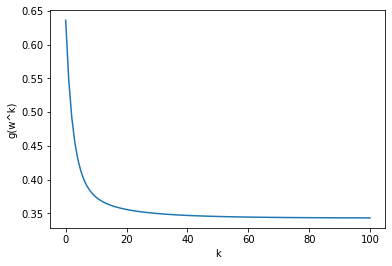

In [175]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cost_history);
plt.xlabel("k");
plt.ylabel("g(w^k)");

Problem 5: Using gradient descent to minimize the Perceptron cost

In [176]:
data = np.loadtxt(datapath + '3d_classification_data_v0.csv',delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

In [177]:
# compute linear combination of input points
def model(x,w):
  # finish the function implementation
    a = w[0] + np.dot(x.T,w[1:])
    return a.T


In [178]:
# an implementation of the perceptron cost
def perceptron(w):    
    # compute the least squares cost
    # finish the implementation
    cost = np.sum(np.maximum(0, -y * model(x,w))) 
    return cost/float(np.size(y))


In [179]:
# setup optimizer input (besides cost)
alpha = 10**(-1)
max_its = 50
w = 0.1*np.random.randn(2+1,1)


# run gradient descent to minimize the Least Squares cost for linear regression
g = perceptron;
weight_history_1,cost_history_1 = gradient_descent(g,alpha,max_its,w,version = 'normalized')
alpha = 10**(-2)
weight_history_2,cost_history_2 = gradient_descent(g,alpha,max_its,w,version = 'normalized')

In [180]:
### cost functions ###
def counting_cost(w,x,y):
    # compute predicted labels
    y_hat = np.sign(model(x,w))

    # compare to true labels
    ind = np.argwhere(y != y_hat)
    ind = [v[1] for v in ind]

    cost = np.sum(len(ind))
    return cost

In [181]:
count_history_1 = [counting_cost(v,x,y) for v in weight_history_1]
count_history_2 = [counting_cost(v,x,y) for v in weight_history_2]

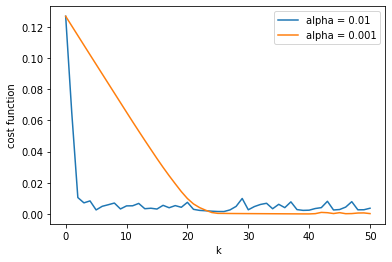

In [182]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cost_history_1);
plt.plot(cost_history_2);
plt.xlabel("k");
plt.ylabel("cost function");
plt.legend(["alpha = 0.01", "alpha = 0.001"]);

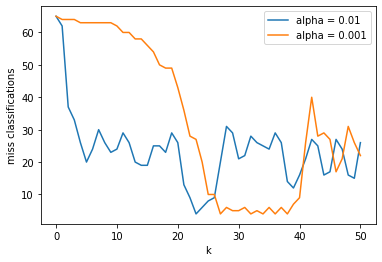

In [183]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(count_history_1);
plt.plot(count_history_2);
plt.xlabel("k");
plt.ylabel("miss classifications");
plt.legend(["alpha = 0.01", "alpha = 0.001"]);